In [22]:
import pandas as pd
import numpy as np
import os
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [23]:
file_names = ["CAL.csv", "CAR.csv", "CENT.csv", "FLA.csv", "MIDA.csv", "MIDW.csv", "NE.csv", "NW.csv", "NY.csv", "SE.csv",
              "SW.csv", "TEN.csv", "TEX.csv"]

directory = "../Data/Preprocessed"

column_dtypes = {
    'Demand (MW)': 'float64',
    'Net Generation (MW)': 'float64'
}

combined_regions_df = list()

for file_name in file_names:
    file_path = os.path.join(directory, file_name)
    df = pd.read_csv(file_path, parse_dates=['UTC Time at End of Hour'], dtype=column_dtypes, index_col='UTC Time at End of Hour')
    combined_regions_df.append(df)

In [24]:
# Generate train and test dataframes
train_df_lst = []
test_df_lst = []
for i in range(len(combined_regions_df)):
    train_size = int(len(combined_regions_df[i]) * 0.90) # 90 % data in train set
    train_df, test_df = combined_regions_df[i][0:train_size], combined_regions_df[i][train_size:]
    train_df_lst.append(train_df)
    test_df_lst.append(test_df)

In [25]:
train_df_lst[0]['Demand (MW)'].reset_index()

,UTC Time at End of Hour,Demand (MW)
0,2015-07-01,615661.0
1,2015-07-02,964443.0
2,2015-07-03,904339.0
3,2015-07-04,863264.0
4,2015-07-05,801034.0
...,...,...
2186,2021-06-25,809320.0
2187,2021-06-26,814018.0
2188,2021-06-27,838133.0
2189,2021-06-28,880656.0


15:57:33 - cmdstanpy - INFO - Chain [1] start processing


Calculating: CAL


15:57:33 - cmdstanpy - INFO - Chain [1] done processing


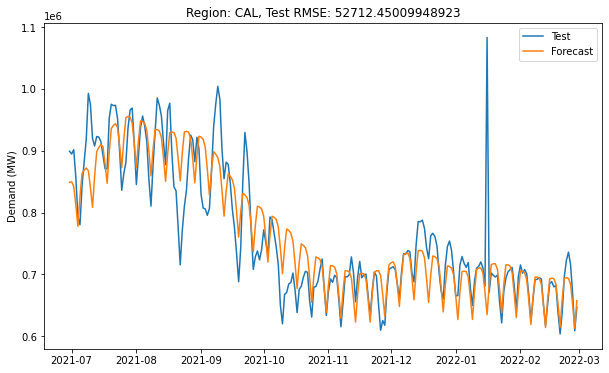

15:57:34 - cmdstanpy - INFO - Chain [1] start processing


Calculating: CAR


15:57:34 - cmdstanpy - INFO - Chain [1] done processing


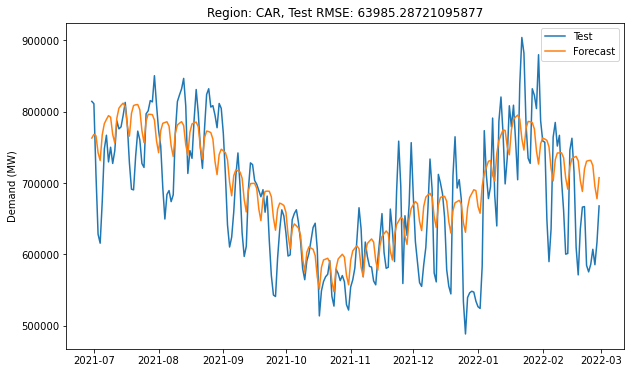

15:57:34 - cmdstanpy - INFO - Chain [1] start processing


Calculating: CENT


15:57:35 - cmdstanpy - INFO - Chain [1] done processing


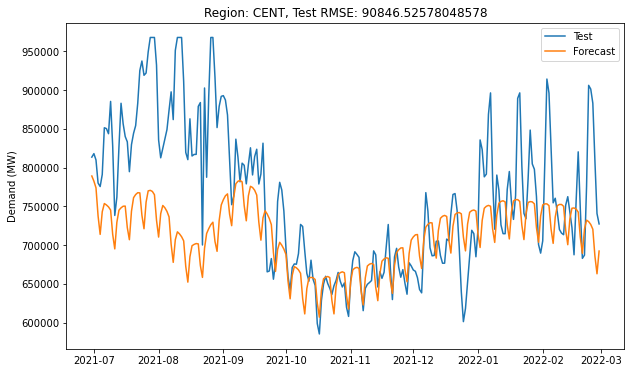

15:57:35 - cmdstanpy - INFO - Chain [1] start processing


Calculating: FLA


15:57:35 - cmdstanpy - INFO - Chain [1] done processing


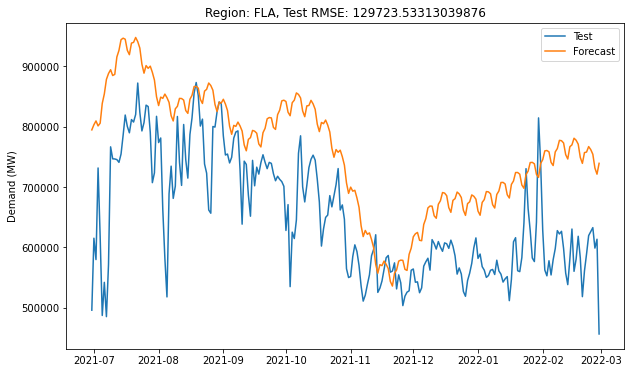

15:57:36 - cmdstanpy - INFO - Chain [1] start processing


Calculating: MIDA


15:57:36 - cmdstanpy - INFO - Chain [1] done processing


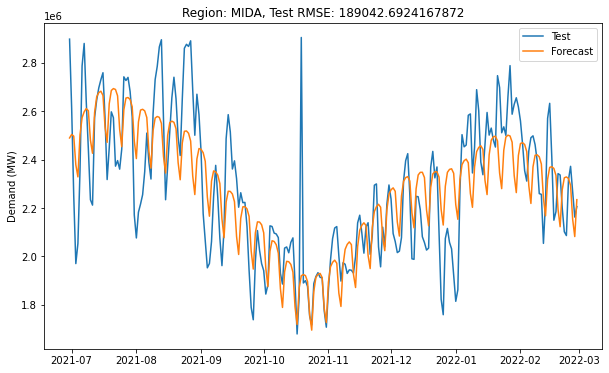

15:57:37 - cmdstanpy - INFO - Chain [1] start processing


Calculating: MIDW


15:57:37 - cmdstanpy - INFO - Chain [1] done processing


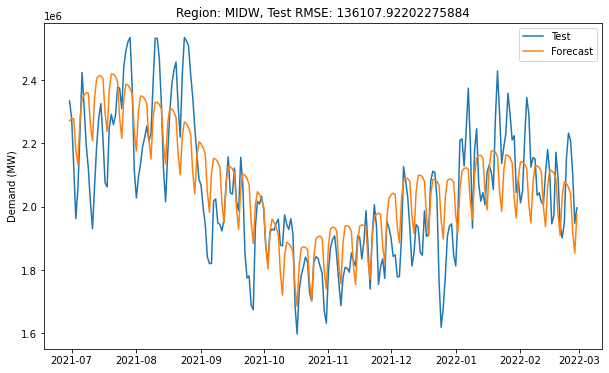

15:57:37 - cmdstanpy - INFO - Chain [1] start processing


Calculating: NE


15:57:38 - cmdstanpy - INFO - Chain [1] done processing


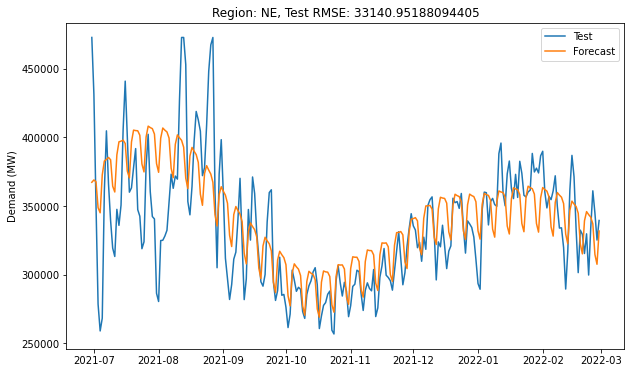

15:57:38 - cmdstanpy - INFO - Chain [1] start processing


Calculating: NW


15:57:38 - cmdstanpy - INFO - Chain [1] done processing


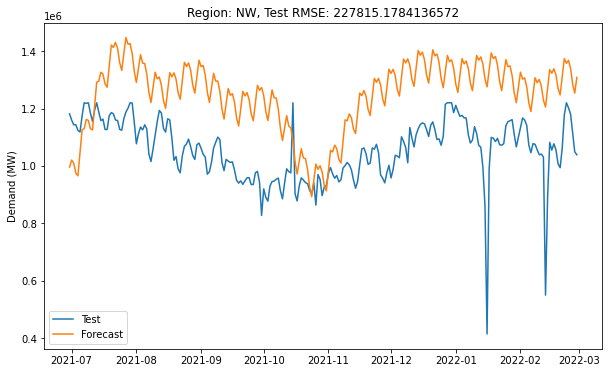

15:57:39 - cmdstanpy - INFO - Chain [1] start processing


Calculating: NY


15:57:39 - cmdstanpy - INFO - Chain [1] done processing


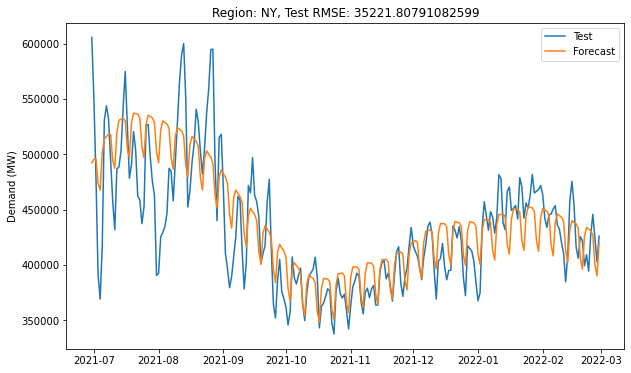

15:57:40 - cmdstanpy - INFO - Chain [1] start processing


Calculating: SE


15:57:40 - cmdstanpy - INFO - Chain [1] done processing


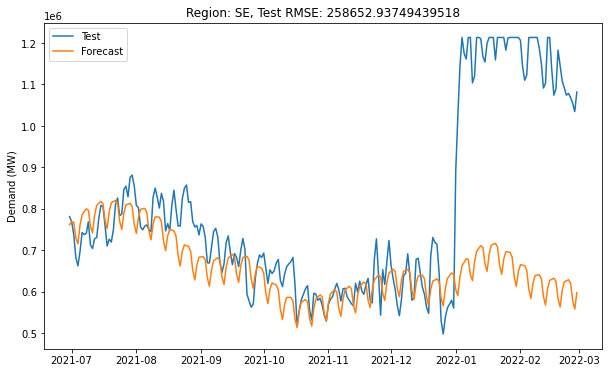

15:57:40 - cmdstanpy - INFO - Chain [1] start processing


Calculating: SW


15:57:40 - cmdstanpy - INFO - Chain [1] done processing


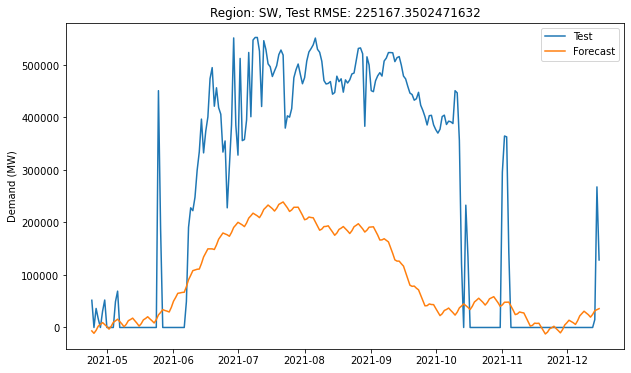

15:57:41 - cmdstanpy - INFO - Chain [1] start processing


Calculating: TEN


15:57:41 - cmdstanpy - INFO - Chain [1] done processing


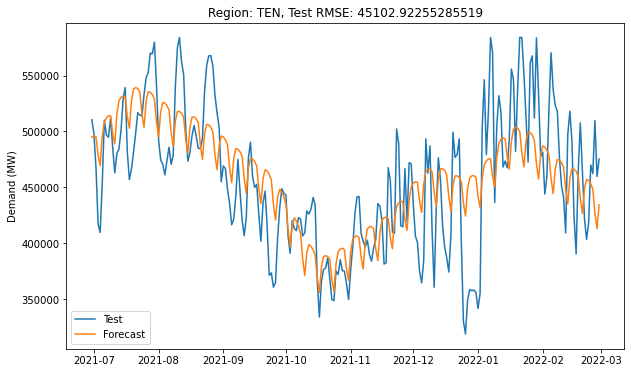

15:57:42 - cmdstanpy - INFO - Chain [1] start processing


Calculating: TEX


15:57:42 - cmdstanpy - INFO - Chain [1] done processing


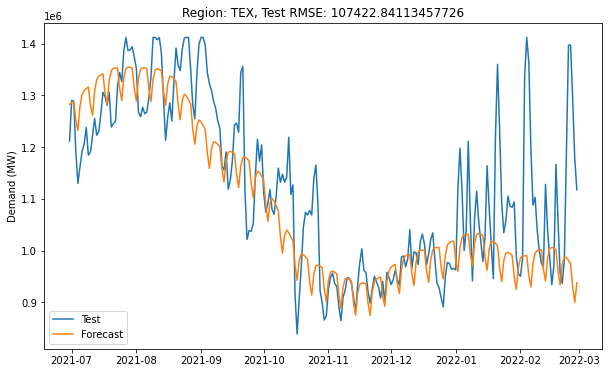

In [34]:
pred_list = []
rmse_list = []
for i in range(len(train_df_lst)):
    print("Calculating: {}".format(file_names[i].split('.')[0]))
    demand_model = Prophet()
    train_df = train_df_lst[i].reset_index()
    train_df = train_df[['UTC Time at End of Hour', 'Demand (MW)']]
    train_df = train_df.rename(columns={'UTC Time at End of Hour': 'ds', 'Demand (MW)': 'y'})
    demand_model.fit(train_df)
    test_df = test_df_lst[i].reset_index()
    test_df = test_df[['UTC Time at End of Hour', 'Demand (MW)']]
    test_df = test_df.rename(columns={'UTC Time at End of Hour': 'ds', 'Demand (MW)': 'y'})
    future_demand = demand_model.make_future_dataframe(periods=len(test_df))
    forecast_demand = demand_model.predict(future_demand)
    forecast_demand = forecast_demand[['ds', 'yhat']][-len(test_df):]
    actual = test_df['y'].values
    forecasted = forecast_demand['yhat'].values
    rmse = np.sqrt(mean_squared_error(actual, forecasted))
    plt.figure(figsize = (10, 6))
    plt.plot(test_df['ds'], actual, label = 'Test')
    plt.plot(forecast_demand['ds'], forecasted, label = 'Forecast')
    plt.ylabel("Demand (MW)")
    plt.legend()
    plt.title('Region: {}, Test RMSE: {}'.format(file_names[i].split('.')[0], rmse))
    plt.show()
   

16:01:49 - cmdstanpy - INFO - Chain [1] start processing


Calculating: CAL


16:01:50 - cmdstanpy - INFO - Chain [1] done processing


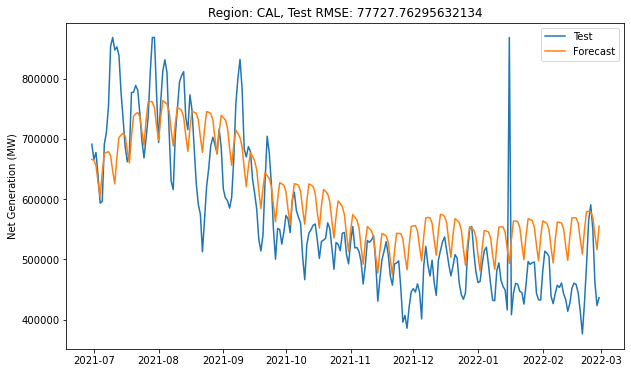

16:01:50 - cmdstanpy - INFO - Chain [1] start processing


Calculating: CAR


16:01:50 - cmdstanpy - INFO - Chain [1] done processing


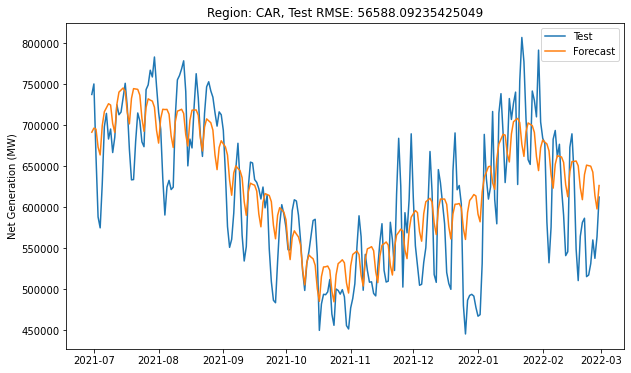

16:01:51 - cmdstanpy - INFO - Chain [1] start processing


Calculating: CENT


16:01:51 - cmdstanpy - INFO - Chain [1] done processing


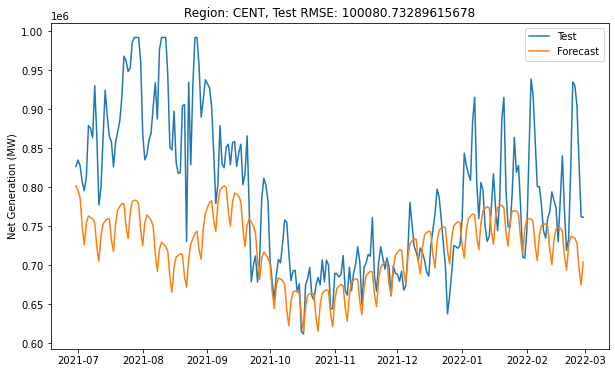

16:01:52 - cmdstanpy - INFO - Chain [1] start processing


Calculating: FLA


16:01:52 - cmdstanpy - INFO - Chain [1] done processing


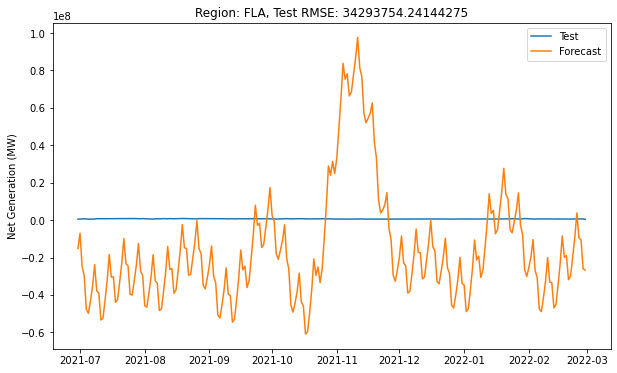

16:01:52 - cmdstanpy - INFO - Chain [1] start processing


Calculating: MIDA


16:01:53 - cmdstanpy - INFO - Chain [1] done processing


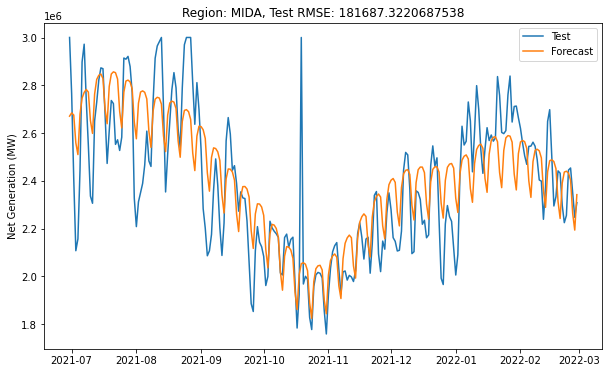

16:01:53 - cmdstanpy - INFO - Chain [1] start processing


Calculating: MIDW


16:01:53 - cmdstanpy - INFO - Chain [1] done processing


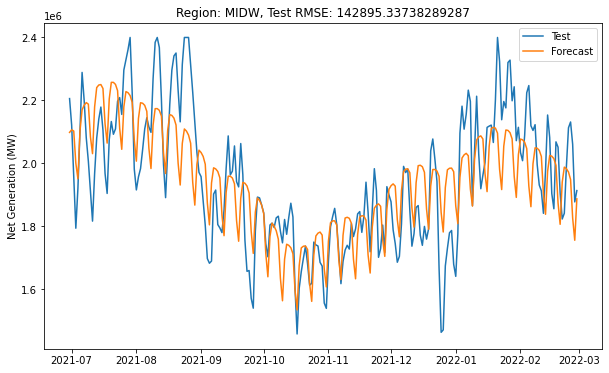

16:01:54 - cmdstanpy - INFO - Chain [1] start processing


Calculating: NE


16:01:54 - cmdstanpy - INFO - Chain [1] done processing


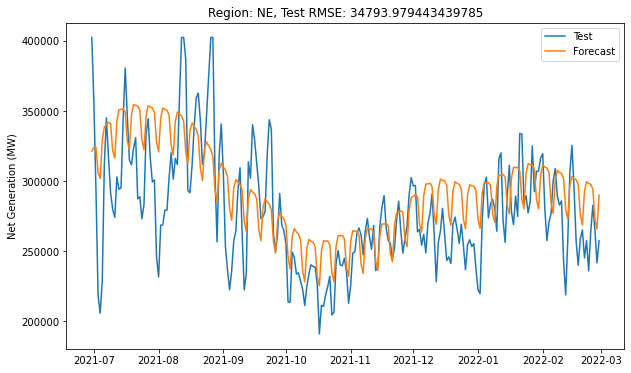

16:01:55 - cmdstanpy - INFO - Chain [1] start processing


Calculating: NW


16:01:55 - cmdstanpy - INFO - Chain [1] done processing


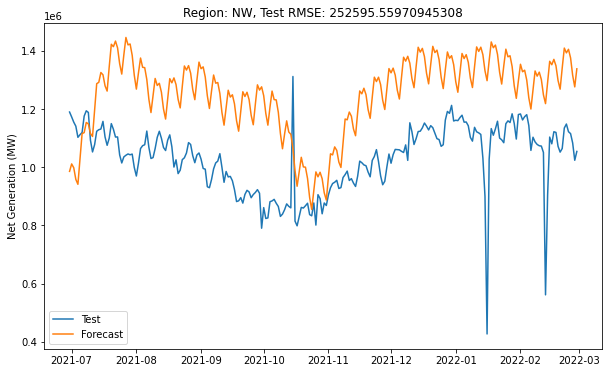

16:01:55 - cmdstanpy - INFO - Chain [1] start processing


Calculating: NY


16:01:55 - cmdstanpy - INFO - Chain [1] done processing


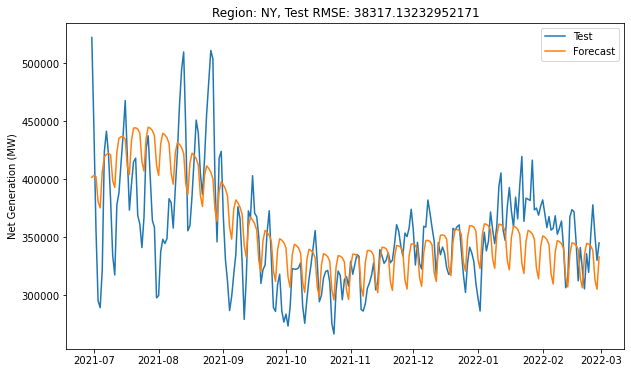

16:01:56 - cmdstanpy - INFO - Chain [1] start processing


Calculating: SE


16:01:56 - cmdstanpy - INFO - Chain [1] done processing


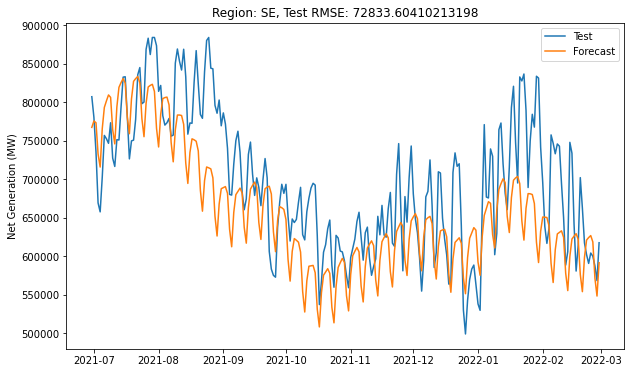

16:01:57 - cmdstanpy - INFO - Chain [1] start processing


Calculating: SW


16:01:57 - cmdstanpy - INFO - Chain [1] done processing


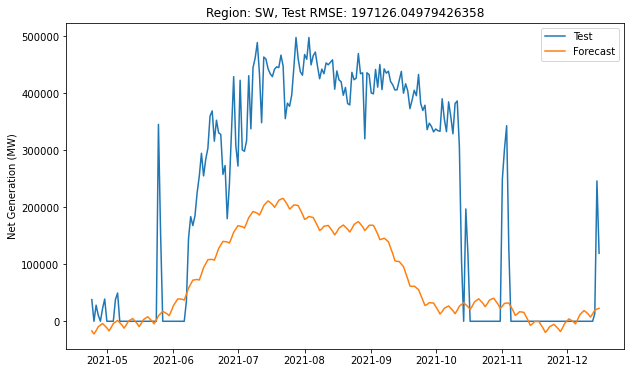

16:01:57 - cmdstanpy - INFO - Chain [1] start processing


Calculating: TEN


16:01:58 - cmdstanpy - INFO - Chain [1] done processing


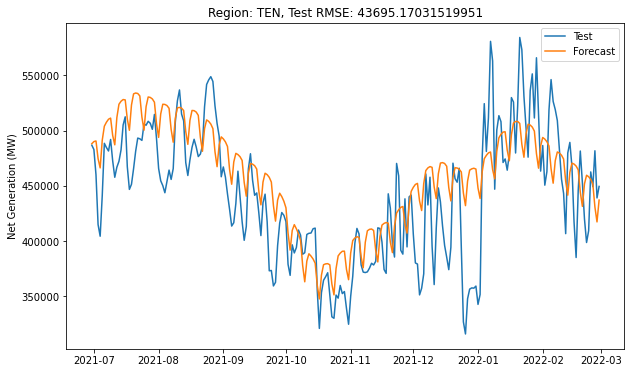

16:01:58 - cmdstanpy - INFO - Chain [1] start processing


Calculating: TEX


16:01:58 - cmdstanpy - INFO - Chain [1] done processing


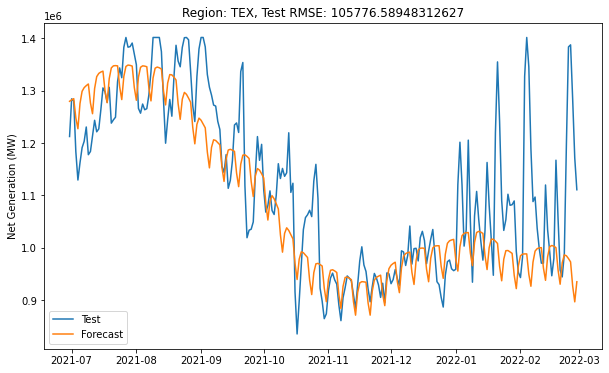

In [35]:
pred_list = []
rmse_list = []
for i in range(len(train_df_lst)):
    print("Calculating: {}".format(file_names[i].split('.')[0]))
    net_generation_model = Prophet()
    train_df = train_df_lst[i].reset_index()
    train_df = train_df[['UTC Time at End of Hour', 'Net Generation (MW)']]
    train_df = train_df.rename(columns={'UTC Time at End of Hour': 'ds', 'Net Generation (MW)': 'y'})
    net_generation_model.fit(train_df)
    test_df = test_df_lst[i].reset_index()
    test_df = test_df[['UTC Time at End of Hour', 'Net Generation (MW)']]
    test_df = test_df.rename(columns={'UTC Time at End of Hour': 'ds', 'Net Generation (MW)': 'y'})
    future_net_generation = net_generation_model.make_future_dataframe(periods=len(test_df))
    forecast_net_generation = net_generation_model.predict(future_net_generation)
    forecast_net_generation = forecast_net_generation[['ds', 'yhat']][-len(test_df):]
    actual = test_df['y'].values
    forecasted = forecast_net_generation['yhat'].values
    rmse = np.sqrt(mean_squared_error(actual, forecasted))
    plt.figure(figsize = (10, 6))
    plt.plot(test_df['ds'], actual, label = 'Test')
    plt.plot(forecast_net_generation['ds'], forecasted, label = 'Forecast')
    plt.ylabel("Net Generation (MW)")
    plt.legend()
    plt.title('Region: {}, Test RMSE: {}'.format(file_names[i].split('.')[0], rmse))
    plt.show()
   